In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/H2GTRE.TTF"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
# #rc('font', family=font_name)
rc('font', family='Gothic')

%matplotlib inline
plt.rc('font', family=font_name)

In [3]:
test=pd.read_csv('data/2014년 12월 _ 2018년 12월 월간 매매거래동향(아파트)..csv',encoding='utf-8')

In [4]:
list(test.날짜)

['2014-12-01',
 '2015-01-01',
 '2015-02-01',
 '2015-03-01',
 '2015-04-01',
 '2015-05-01',
 '2015-06-01',
 '2015-07-01',
 '2015-08-01',
 '2015-09-01',
 '2015-10-01',
 '2015-11-01',
 '2015-12-01',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01',
 '2016-08-01',
 '2016-09-01',
 '2016-10-01',
 '2016-11-01',
 '2016-12-01',
 '2017-01-01',
 '2017-02-01',
 '2017-03-01',
 '2017-04-01',
 '2017-05-01',
 '2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01']

<AxesSubplot:>

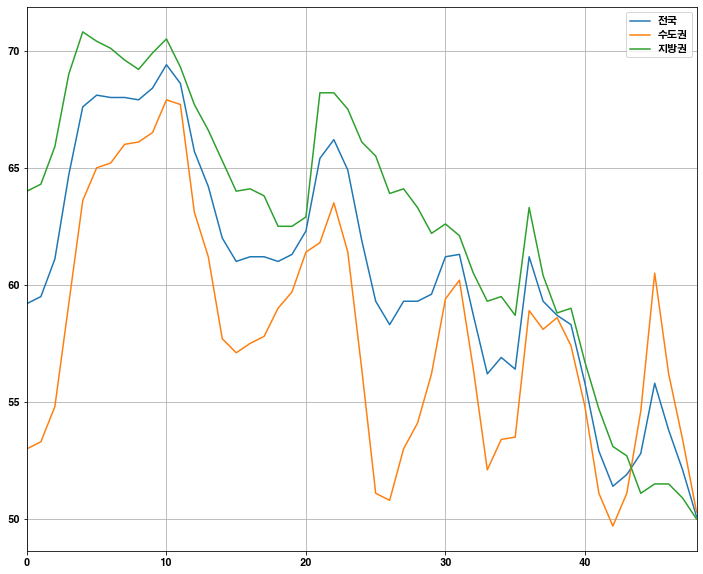

In [5]:
test[['전국','수도권','지방권']].plot(figsize=(12,10), grid=True)

In [6]:
df = pd.DataFrame({
    'ds': test['날짜'],
    'y': test['전국']
})

In [7]:
df2 = pd.DataFrame({
    'ds': test.날짜,
    'y': test['수도권']
})

In [8]:
df.ds

0     2014-12-01
1     2015-01-01
2     2015-02-01
3     2015-03-01
4     2015-04-01
5     2015-05-01
6     2015-06-01
7     2015-07-01
8     2015-08-01
9     2015-09-01
10    2015-10-01
11    2015-11-01
12    2015-12-01
13    2016-01-01
14    2016-02-01
15    2016-03-01
16    2016-04-01
17    2016-05-01
18    2016-06-01
19    2016-07-01
20    2016-08-01
21    2016-09-01
22    2016-10-01
23    2016-11-01
24    2016-12-01
25    2017-01-01
26    2017-02-01
27    2017-03-01
28    2017-04-01
29    2017-05-01
30    2017-06-01
31    2017-07-01
32    2017-08-01
33    2017-09-01
34    2017-10-01
35    2017-11-01
36    2017-12-01
37    2018-01-01
38    2018-02-01
39    2018-03-01
40    2018-04-01
41    2018-05-01
42    2018-06-01
43    2018-07-01
44    2018-08-01
45    2018-09-01
46    2018-10-01
47    2018-11-01
48    2018-12-01
Name: ds, dtype: object

In [9]:
m= Prophet(weekly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=60)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
104,2019-01-26
105,2019-01-27
106,2019-01-28
107,2019-01-29
108,2019-01-30


In [10]:
forecast = m.predict(future)

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
104,2019-01-26,50.066407,39.812180,44.887459,50.041394,50.094118,-7.784548,-7.784548,-7.784548,1.562584,1.562584,1.562584,-9.347132,-9.347132,-9.347132,0.0,0.0,0.0,42.281859
105,2019-01-27,50.050841,35.611175,40.755956,50.025021,50.079271,-11.947612,-11.947612,-11.947612,-2.286133,-2.286133,-2.286133,-9.661479,-9.661479,-9.661479,0.0,0.0,0.0,38.103229
106,2019-01-28,50.035274,38.191227,43.256738,50.008226,50.064771,-9.335026,-9.335026,-9.335026,-0.051478,-0.051478,-0.051478,-9.283548,-9.283548,-9.283548,0.0,0.0,0.0,40.700248
107,2019-01-29,50.019708,40.215566,45.155171,49.991862,50.049826,-7.231542,-7.231542,-7.231542,0.965288,0.965288,0.965288,-8.196830,-8.196830,-8.196830,0.0,0.0,0.0,42.788166
108,2019-01-30,50.004141,39.844763,44.910014,49.975193,50.035571,-7.589782,-7.589782,-7.589782,-1.184587,-1.184587,-1.184587,-6.405195,-6.405195,-6.405195,0.0,0.0,0.0,42.414359


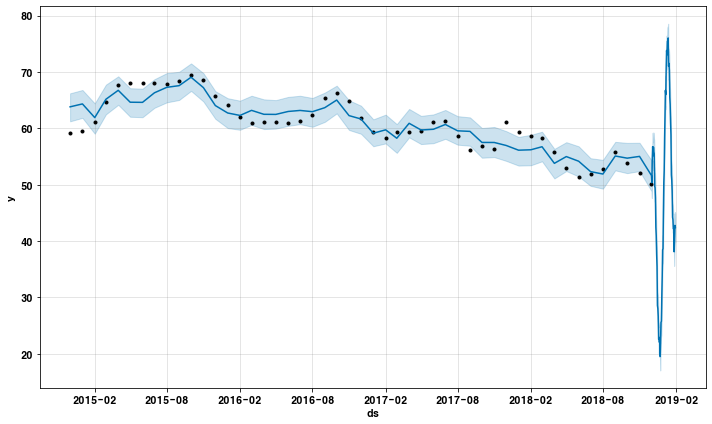

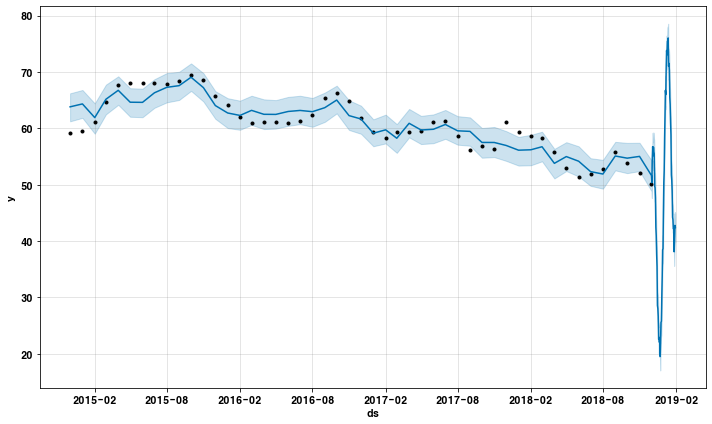

In [12]:
m.plot(forecast)

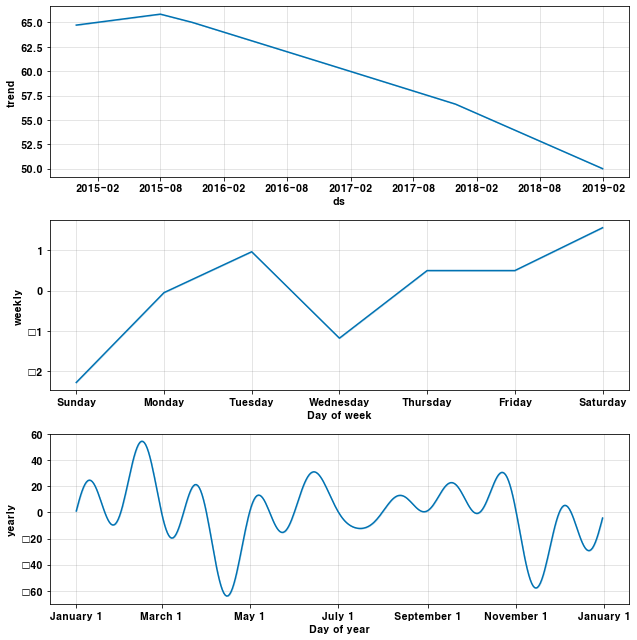

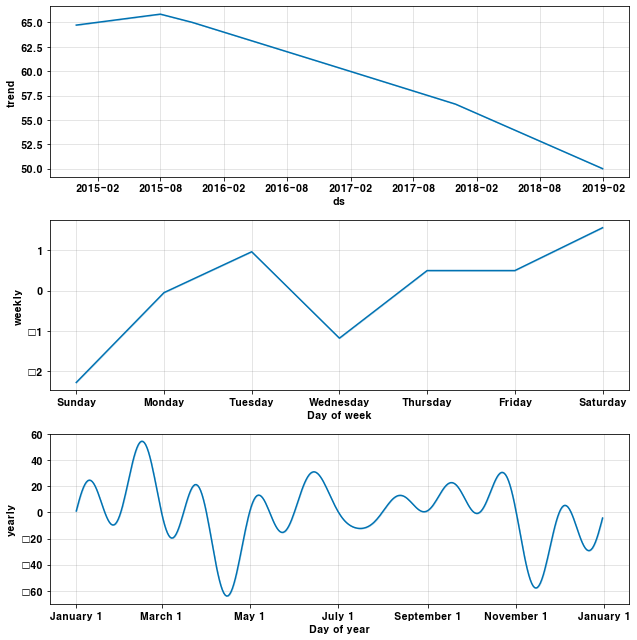

In [13]:
m.plot_components(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


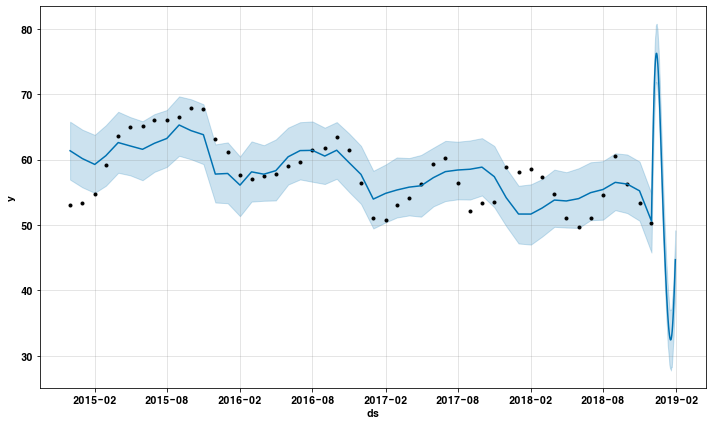

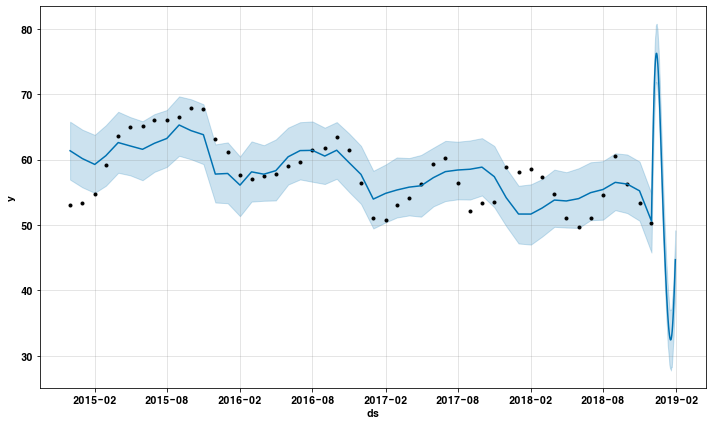

In [14]:
m2= Prophet(daily_seasonality=True)
m2.fit(df2)
future2 = m2.make_future_dataframe(periods=60)
forecast2 = m2.predict(future2)
m2.plot(forecast2)

In [15]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-12-01,3.747475,56.944650,65.801110,3.747475,3.747475,57.613310,57.613310,57.613310,59.707713,59.707713,59.707713,-2.094403,-2.094403,-2.094403,0.0,0.0,0.0,61.360785
1,2015-01-01,3.520011,55.758428,64.576261,3.520011,3.520011,56.635759,56.635759,56.635759,59.707713,59.707713,59.707713,-3.071955,-3.071955,-3.071955,0.0,0.0,0.0,60.155770
2,2015-02-01,3.292547,54.915474,63.782341,3.292547,3.292547,55.975094,55.975094,55.975094,59.707713,59.707713,59.707713,-3.732620,-3.732620,-3.732620,0.0,0.0,0.0,59.267641
3,2015-03-01,3.087095,56.006447,65.267941,3.087095,3.087095,57.522147,57.522147,57.522147,59.707713,59.707713,59.707713,-2.185567,-2.185567,-2.185567,0.0,0.0,0.0,60.609242
4,2015-04-01,2.859631,57.990692,67.313487,2.859631,2.859631,59.750715,59.750715,59.750715,59.707713,59.707713,59.707713,0.043002,0.043002,0.043002,0.0,0.0,0.0,62.610347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2019-01-26,-7.417656,33.664285,42.816600,-7.417688,-7.417608,45.440385,45.440385,45.440385,59.707713,59.707713,59.707713,-14.267328,-14.267328,-14.267328,0.0,0.0,0.0,38.022729
105,2019-01-27,-7.425022,35.380666,44.413641,-7.425055,-7.424971,46.939180,46.939180,46.939180,59.707713,59.707713,59.707713,-12.768534,-12.768534,-12.768534,0.0,0.0,0.0,39.514158
106,2019-01-28,-7.432388,36.790418,45.810436,-7.432421,-7.432335,48.574567,48.574567,48.574567,59.707713,59.707713,59.707713,-11.133146,-11.133146,-11.133146,0.0,0.0,0.0,41.142180
107,2019-01-29,-7.439753,38.226529,47.312322,-7.439789,-7.439700,50.323682,50.323682,50.323682,59.707713,59.707713,59.707713,-9.384031,-9.384031,-9.384031,0.0,0.0,0.0,42.883929
